In [39]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import namedtuple
from pathlib import Path
import os
Cluster = namedtuple('Point', 'x y z')#meant to convey x,y,z mean of cluster
#repopath = Path(__file__).parent
# fname = r'D:\ObstacleSegmentation\1636310276 - 4-3877 ms.txt'
#fname = r'1636310276 - 4-3877 ms.txt'
fname = r'1636468456 - 1-4789 ms.txt'
#file = os.path.join(repopath,fname)
#output = os.path.join(repopath,'beta_angles_' + fname)

#create pandas dataframe from asc file
df = pd.read_csv(fname,header=None,delimiter = ' ')

#rename the columns based on output from cloudcompare 
#df.columns =['x','y','z', 'dist','ang','time','r','g','b','empty']
df.columns = ['x', 'y', 'z', 'r', 'g', 'b', 'dist','ang', 'time']
#df = pd.read_csv('D:/ObstacleSegmentation/1636310276.7642572_LidarSensor1_pointcloud.asc')
npdf = df[['x','y','z']].to_numpy()

In [40]:
clustering = DBSCAN(eps=.5, min_samples=2).fit(npdf)


(array([48091.,  2808.,  1649.,  6958.,  1138.,  1635.,  2416.,  2281.,
         1098.,   603.]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <BarContainer object of 10 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
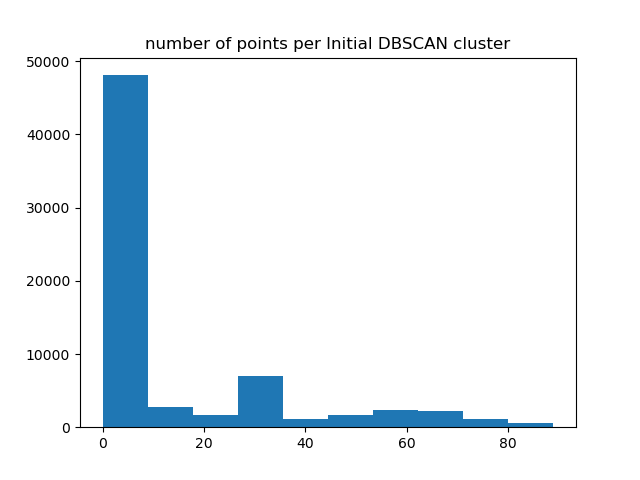

In [41]:
%matplotlib widget
plt.title('number of points per Initial DBSCAN cluster')
plt.hist(clustering.labels_)



In [42]:
df['clusterfromdbscan'] = clustering.labels_
dfsample = df[df.clusterfromdbscan < 10]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
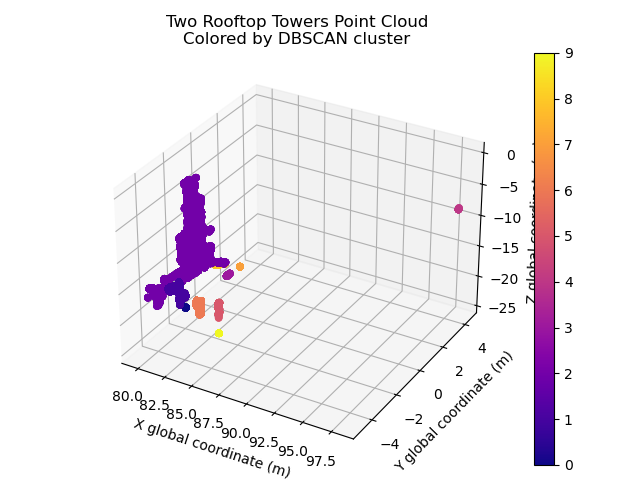

In [43]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(dfsample.x,dfsample.y,dfsample.z,c = dfsample.clusterfromdbscan,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by DBSCAN cluster")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
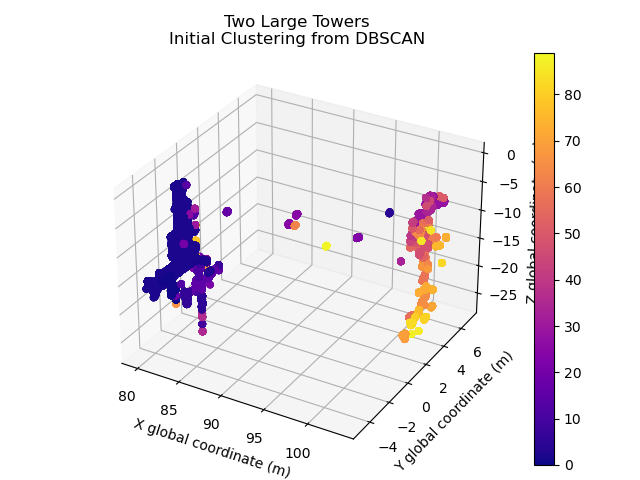

In [44]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(df.x,df.y,df.z,c = clustering.labels_,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Large Towers\nInitial Clustering from DBSCAN")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [45]:
df.head()

,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan
0,81.902939,-3.356046,-19.091173,255,255,0,83.802963,0.0,1.0,0
1,82.015327,-3.856131,-16.145054,255,255,0,83.372543,0.0,1.0,1
2,80.735931,-4.284312,-15.923514,255,255,0,82.096764,0.0,1.0,2
3,83.521652,-1.321171,-16.396523,255,255,0,84.820717,0.0,1.0,3
4,81.926697,-3.767281,-16.128708,255,255,0,83.278458,0.0,1.0,1


In [46]:
exampleclusterdf = df[df['clusterfromdbscan']==0]
exampleclusterdf.describe()


,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan
count,185.000000,185.000000,185.000000,185.0,185.0,185.0,185.000000,185.000000,185.000000,185.0
mean,81.905725,-3.364522,-19.091908,255.0,255.0,0.0,81.541907,0.012233,2301.675676,0.0
std,0.001350,0.006636,0.032728,0.0,0.0,0.0,1.229103,0.015335,1177.789225,0.0
min,81.902939,-3.371413,-19.134674,255.0,255.0,0.0,80.288124,0.000000,1.000000,0.0
25%,81.906349,-3.371413,-19.134674,255.0,255.0,0.0,80.288124,0.000481,2410.000000,0.0
50%,81.906349,-3.359715,-19.091173,255.0,255.0,0.0,81.540199,0.002349,2464.000000,0.0
75%,81.906410,-3.359715,-19.061235,255.0,255.0,0.0,81.540199,0.033459,3342.000000,0.0
max,81.906410,-3.356046,-19.061235,255.0,255.0,0.0,83.802963,0.033496,3416.000000,0.0


In [47]:
def XYZmean(df):
    print(type(df))
    xmean=np.mean(df['x'])
    ymean=np.mean(df.y)
    zmean=np.mean(df.z)
    xstd=np.std(df.x)
    ystd=np.std(df.y)
    zstd=np.std(df.z)
    rad=2*max([xstd,ystd,zstd])
    return Cluster(xmean, ymean, zmean, rad) #assigning to tuple "cluster"

cluster_centers=dict.fromkeys(df.clusterfromdbscan.unique())
for cluster in df.clusterfromdbscan.unique():  
    tempclusterseries = df[df['clusterfromdbscan']==cluster][['x', 'y', 'z']].agg('mean') #grabs all points associated with cluster in for loop step
    
    cluster_centers[cluster]= Cluster(tempclusterseries.x,tempclusterseries.y,tempclusterseries.z) #makes cluster series type into dict, 'cluster_centers.x,...'
#print(type(cluster_centers))
#cluster_centers


4.0920763016215735


(array([ 1.,  0.,  0., 32.,  0.,  0., 54.,  0.,  0.,  3.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <BarContainer object of 10 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
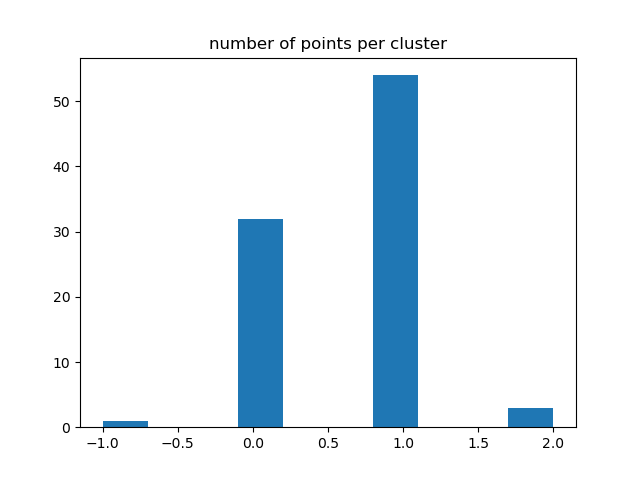

In [48]:
#Associate clusters by neighborhood
# np.array(cluster_centers.items())
cluster_center_array=pd.DataFrame.from_dict(cluster_centers,orient='index').to_numpy()
LIDAR_range=100
elevation_angle=(30*np.pi)/180
number_beams=16
raster_buffer=1.25 #25%
distance_between_raster_lines=LIDAR_range*np.tan(elevation_angle / number_beams)*raster_buffer
print(distance_between_raster_lines)
neighborhood_clustering = DBSCAN(eps=distance_between_raster_lines, min_samples=2).fit(cluster_center_array)
neighborhood_clustering_variable = neighborhood_clustering.labels_

%matplotlib widget
plt.title('number of points per cluster')
plt.hist(neighborhood_clustering.labels_)


In [49]:
# for point,newcluster in neighborhood_clustering.labels_
newclusters = pd.DataFrame(neighborhood_clustering.labels_)
newclusters.columns = ['newcluster']
clustercenterdf = pd.DataFrame(cluster_center_array)

clustercenterdf = clustercenterdf.join(newclusters)

clustercenterdf.columns=['x','y','z','newcluster']
print(clustercenterdf)

old2newclustermap = clustercenterdf.newcluster.to_dict()

df['newcluster'] = df['clusterfromdbscan'].map(old2newclustermap)


             x         y          z  newcluster
0    81.905725 -3.364522 -19.091908           0
1    82.010039 -4.025491 -15.287149           0
2    81.340314 -2.553205 -11.374105           0
3    83.514283 -1.473057 -16.398145           0
4    98.053956  4.378342  -8.502248           1
..         ...       ...        ...         ...
85  103.090332  3.082546  -9.311580           1
86  102.425064  3.751647 -26.736063           1
87  102.091278  3.263652 -26.673571           1
88   93.527328  1.835336 -12.483469           1
89  101.908524  4.378951  -9.373247           1

[90 rows x 4 columns]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
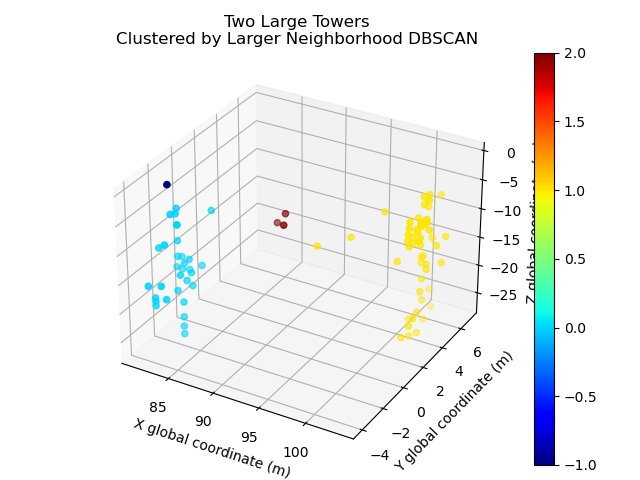

In [50]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
#p = ax3D.scatter(df.x,df.y,df.z)#original points colored by neighborhood, removed "",c = df.newcluster,cmap = plt.get_cmap("plasma")""
p = ax3D.scatter(clustercenterdf.x,clustercenterdf.y,clustercenterdf.z,c = clustercenterdf.newcluster,cmap = plt.get_cmap("jet"))#just centers that were basis for neighbor
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Large Towers\nClustered by Larger Neighborhood DBSCAN")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [51]:
exampleclusterdf2 = df[df['clusterfromdbscan']==1] #pulls out a single DBSCAN cluster
exampleclusterdf2.describe()

,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan,newcluster
count,2747.000000,2747.000000,2747.000000,2747.0,2747.0,2747.0,2747.000000,2747.000000,2747.000000,2747.0,2747.0
mean,82.010039,-4.025491,-15.287149,255.0,255.0,0.0,80.193611,0.028367,3133.042956,1.0,0.0
std,0.134866,0.316324,1.247887,0.0,0.0,0.0,1.509912,0.027016,1284.274344,0.0,0.0
min,81.779633,-4.558759,-17.393925,255.0,255.0,0.0,78.450485,0.000000,1.000000,1.0,0.0
25%,81.900269,-4.296485,-16.640425,255.0,255.0,0.0,78.954956,0.012411,2510.500000,1.0,0.0
50%,82.015327,-4.082365,-14.514559,255.0,255.0,0.0,79.439629,0.024874,3691.000000,1.0,0.0
75%,82.039383,-3.822092,-14.212962,255.0,255.0,0.0,81.064240,0.031505,4027.000000,1.0,0.0
max,82.330330,-3.339326,-13.774132,255.0,255.0,0.0,83.678764,0.177260,4642.000000,1.0,0.0


In [52]:
def specialangle(pt1,pt2):
    psi = np.abs(pt1.ang - pt2.ang)
    num = pt1.dist * np.sin(psi)
    den = (pt1.dist - pt2.dist) * np.cos(psi)
    beta = np.arctan2(num,den)
    return beta

for cluster in clustercenterdf.newcluster.unique(): #loop through all points in cluster neighborhood
    for point1 in clustercenterdf[clustercenterdf.newcluster==cluster].iterrows():
        print(point1)
        #for point2 in clustercenterdf[clustercenterdf.newcluster==cluster].iterrows():
		#   If point1 = point2
		#		continue
		#	Else
        
#for row in range(0,len(df_byx)-1,1):
#    df_byx.at[row,'beta'] = specialangle(df_byx.iloc[row], df_byx.iloc[row+1])
            

(0, x             81.905725
y             -3.364522
z            -19.091908
newcluster     0.000000
Name: 0, dtype: float64)
(1, x             82.010039
y             -4.025491
z            -15.287149
newcluster     0.000000
Name: 1, dtype: float64)
(2, x             81.340314
y             -2.553205
z            -11.374105
newcluster     0.000000
Name: 2, dtype: float64)
(3, x             83.514283
y             -1.473057
z            -16.398145
newcluster     0.000000
Name: 3, dtype: float64)
(5, x             83.614294
y             -2.267720
z            -20.204696
newcluster     0.000000
Name: 5, dtype: float64)
(6, x             83.652576
y             -3.754789
z            -17.277762
newcluster     0.000000
Name: 6, dtype: float64)
(7, x             83.644073
y             -0.638710
z            -16.416748
newcluster     0.000000
Name: 7, dtype: float64)
(8, x             82.163959
y             -1.032341
z            -16.061857
newcluster     0.000000
Name: 8, dtype: float64)


In [53]:
def calculate_center(thiscluster): #only consider x and y for intersection overlap algorithm, downstream from neighborhood clusters
    x_center = thiscluster.x.mean()
    y_center = thiscluster.y.mean()
    z_center = thiscluster.z.mean()
    x_std = thiscluster.x.std()
    y_std = thiscluster.y.std()
    rad = 2*max([x_std,y_std]) + 0.5
    return x_center,y_center,rad,z_center

In [54]:
circ1 = calculate_center(exampleclusterdf)
circ2 = calculate_center(exampleclusterdf2)
print(f"cluster1 {circ1}\ncluster2 {circ2}")

cluster1 (81.90572476713514, -3.3645220674054057, 0.5132710393660566, -19.09190816091892)
cluster2 (82.01003895741536, -4.025491178434655, 1.132648851788741, -15.287148577877684)


In [55]:
cluster_radius=dict.fromkeys(df.clusterfromdbscan.unique())
for cluster in df.clusterfromdbscan.unique():  
    [x_center, y_center,rad, z_center] = calculate_center(df[df['clusterfromdbscan']==cluster]) #grabs all points associated with cluster in for loop step
    cluster_radius[cluster]= [x_center, y_center,rad,z_center]

In [56]:
cluster_radius_array=pd.DataFrame.from_dict(cluster_radius,orient='index')
cluster_radius_array.columns=['x','y','rad','z']
cluster_radius_array

,x,y,rad,z
0,81.905725,-3.364522,0.513271,-19.091908
1,82.010039,-4.025491,1.132649,-15.287149
2,81.340314,-2.553205,2.086082,-11.374105
3,83.514283,-1.473057,0.640982,-16.398145
4,98.053956,4.378342,0.517489,-8.502248
...,...,...,...,...
85,103.090332,3.082546,0.500000,-9.311580
86,102.425064,3.751647,0.500000,-26.736063
87,102.091278,3.263652,0.500000,-26.673571
88,93.527328,1.835336,0.585992,-12.483469


In [57]:
def intersection_area(x0, y0, R, x1, y1, r):
    """Return the percentage of intersection of two circles (0 to 1).

    The circles have radii R and r and centers (x1,y1) and (x2,y2).

    """
    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2/(np.pi * min(R,r)**2)
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    return ( r2 * alpha + R2 * beta -
             0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta))
           ) / (np.pi * min(R,r)**2) #area of intersection normalized by area of smallest circle, % containment
intersection_area(circ1[0],circ1[1],circ1[2],circ2[0],circ2[1],circ2[2])

0.9765242970471639

In [58]:
#return overlap score for each pair of clusters
ptlist = cluster_radius_array.index.to_list()
overlapsdict = dict.fromkeys(ptlist) #dictionary for placeholder for everypoint
for idx1,pt1 in cluster_radius_array.iterrows(): #take current index
    overlapsdict[idx1] = dict.fromkeys(ptlist) #make nested dictionary for every point (point 1 to every other one)
    for idx2,pt2 in cluster_radius_array.iterrows(): #looping thrugh every row, iterrrows returns row number and corresponding data
        overlapsdict[idx1][idx2] = intersection_area(pt1.x, pt1.y, pt1.rad, pt2.x, pt2.y, pt2.rad)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
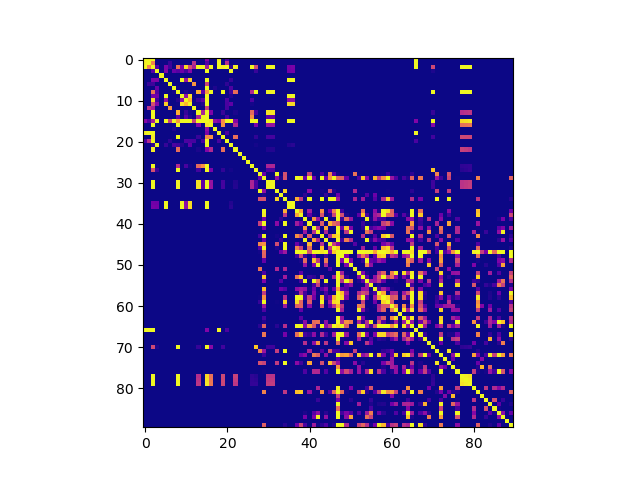

In [59]:
%matplotlib widget
data=pd.DataFrame(overlapsdict).to_numpy()
plt.imshow(data, cmap='plasma', interpolation='nearest')

In [60]:
#create dictionary of points with threshold of each root point
overlap_thresh=0.01
closepointsdict = dict.fromkeys(ptlist) #use index to generate the keys
for point in overlapsdict.keys(): #getting the keys to loop through every point
    ptsinrange = []
    for point2, distance in overlapsdict[point].items(): #getting back point and associated overlap for every entry
        if distance > overlap_thresh:
            ptsinrange.append(point2) #append to ptsinrange
    closepointsdict[point] = ptsinrange #set key being looped through equal to list, 

In [61]:
closepointsdict[5]

[2, 3, 5, 9, 10, 11, 15, 21, 35, 36]

In [62]:
def getadjacent(confirmedhits,pt2check,need2checkstill):
    # current code requires set to be closed (e.g. dictionary must not reference points that aren't in dictionary
    # if pt2check in testdict: 
    need2checkstill = need2checkstill | (set(closepointsdict[pt2check]) - confirmedhits) #union is operator look up closedpointsdict for the point to check 
    if len(need2checkstill) > 0:
        thispt = need2checkstill.pop()
        confirmedhits = confirmedhits | set([thispt]) #union is grouping everything together
        return getadjacent(confirmedhits,thispt,need2checkstill)
    else:
        return confirmedhits

In [63]:
adjacent_confirmed = set()
ungroupedpts = ptlist
need2checkstill = set()
neighbors = getadjacent(adjacent_confirmed,ungroupedpts[3],need2checkstill)
neighbors

{0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 26,
 27,
 30,
 31,
 35,
 36,
 66,
 70,
 77,
 78,
 79}

In [64]:
groupnum = 0
ungroupedpts = ptlist
print(ungroupedpts)
clusters_dict = {}
while len(ungroupedpts) > 0:
    adjacent_confirmed = set()
    need2checkstill = set()
    neighbors = getadjacent(adjacent_confirmed,ungroupedpts[0],need2checkstill)
    clusters_dict[groupnum] = neighbors
    if len(neighbors)==0:
        neighbors = [ungroupedpts[0]]
    print(neighbors)
    ungroupedpts = list(set(ungroupedpts) - set(neighbors))
    groupnum+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27, 30, 31, 35, 36, 66, 70, 77, 78, 79}
{4}
{23}
{24}
{25}
{28, 29, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 89}
{88}
{62}


<BarContainer object of 8 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
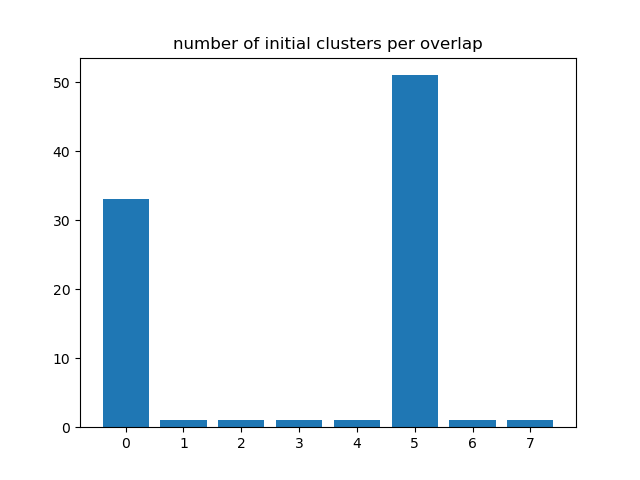

In [65]:
%matplotlib widget
plt.title('number of initial clusters per overlap')
plt.bar(clusters_dict.keys(),[len(v) for k,v in clusters_dict.items()])

In [66]:
reversedclusterdict = {}
for k,v in clusters_dict.items():
    for val in v:
        reversedclusterdict[val] = k

cluster_radius_array['disccluster']=cluster_radius_array.index.map(reversedclusterdict)

In [67]:
cluster_radius_array.describe()

,x,y,rad,z,disccluster
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,94.240073,1.975525,0.667945,-14.068880,3.088889
std,9.236589,3.243760,0.294419,6.138093,2.443264
min,81.304507,-4.025491,0.500000,-26.736063,0.000000
25%,83.359068,-1.365105,0.500000,-17.285558,0.000000
50%,101.252856,3.379153,0.545155,-12.569361,5.000000
75%,101.926651,4.582012,0.723555,-9.030246,5.000000
max,103.411919,6.916776,2.086082,-0.551640,7.000000


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
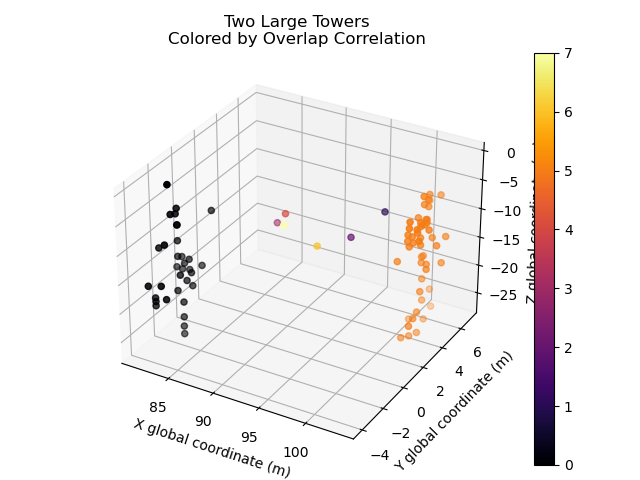

In [68]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
#p = ax3D.scatter(df.x,df.y,df.z)#original points colored by neighborhood, removed "",c = df.newcluster,cmap = plt.get_cmap("plasma")""
p = ax3D.scatter( cluster_radius_array.x,cluster_radius_array.y,cluster_radius_array.z,c = cluster_radius_array.disccluster,cmap = plt.get_cmap("inferno"))#just centers that were basis for neighbor
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Large Towers\nColored by Overlap Correlation")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [69]:
old2newclustermap = cluster_radius_array.disccluster.to_dict() #takes index from cluster from dbscan cluster radius array
old2newclustermap

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 2,
 24: 3,
 25: 4,
 26: 0,
 27: 0,
 28: 5,
 29: 5,
 30: 0,
 31: 0,
 32: 5,
 33: 5,
 34: 5,
 35: 0,
 36: 0,
 37: 5,
 38: 5,
 39: 5,
 40: 5,
 41: 5,
 42: 5,
 43: 5,
 44: 5,
 45: 5,
 46: 5,
 47: 5,
 48: 5,
 49: 5,
 50: 5,
 51: 5,
 52: 5,
 53: 5,
 54: 5,
 55: 5,
 56: 5,
 57: 5,
 58: 5,
 59: 5,
 60: 5,
 61: 5,
 62: 7,
 63: 5,
 64: 5,
 65: 5,
 66: 0,
 67: 5,
 68: 5,
 69: 5,
 70: 0,
 71: 5,
 72: 5,
 73: 5,
 74: 5,
 75: 5,
 76: 5,
 77: 0,
 78: 0,
 79: 0,
 80: 5,
 81: 5,
 82: 5,
 83: 5,
 84: 5,
 85: 5,
 86: 5,
 87: 5,
 88: 6,
 89: 5}

In [70]:
df['disccluster'] = df['clusterfromdbscan'].map(old2newclustermap) #add new column=50k to 90. 90 to 6; original pc to initial DBSCAN. initial DBSCAN to overlap cluster

In [71]:
df.to_csv(os.path.join(fname + 'overlapAlgo.csv'))